In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [5]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
#x[:,0].normal_(mean=0.,std=1.)
x[:5]
# x.normal_?
# torch.rand?

tensor([[-0.5424,  1.0000],
        [ 0.2481,  1.0000],
        [-0.4034,  1.0000],
        [-0.3024,  1.0000],
        [ 0.9842,  1.0000]])

In [6]:
a = tensor(3.,2); a
a.requires_grad

False

In [0]:
y = x@a + torch.rand(n)

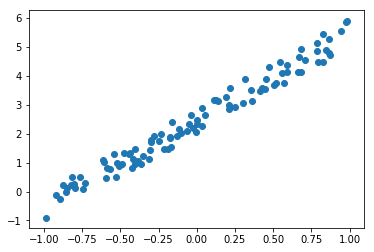

In [8]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [11]:
y_hat = x@a
mse(y_hat, y)

tensor(6.8137)

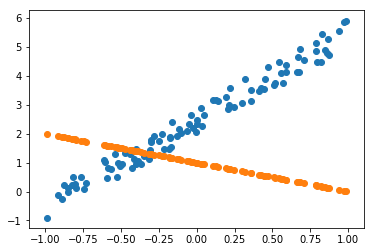

In [12]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [13]:
a = nn.Parameter(a); a
#doc(nn.Parameter)
#(x@a).requires_grad
#y.requires_grad

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_() # if u dont zero, next time loss.backward a's grad will accumulate

In [0]:
# doc(torch.torch.no_grad) 
# torch.torch.no_grad??

In [17]:
lr = 1e-1
for t in range(100): update()

tensor(6.8137, grad_fn=<MeanBackward0>)
tensor(1.4911, grad_fn=<MeanBackward0>)
tensor(0.4844, grad_fn=<MeanBackward0>)
tensor(0.1975, grad_fn=<MeanBackward0>)
tensor(0.1141, grad_fn=<MeanBackward0>)
tensor(0.0898, grad_fn=<MeanBackward0>)
tensor(0.0827, grad_fn=<MeanBackward0>)
tensor(0.0807, grad_fn=<MeanBackward0>)
tensor(0.0801, grad_fn=<MeanBackward0>)
tensor(0.0799, grad_fn=<MeanBackward0>)


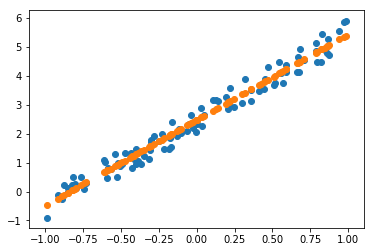

In [18]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [20]:
a = nn.Parameter(tensor(0.,1))
lr=0.12  # tweak here to see how fast it fits/not

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In [0]:
# doc(animation.FuncAnimation)
# np.arange??

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.